In [1]:
import pandas as pd

In [2]:
import h5py 
import numpy as np
def import_tfmodisco_motifs(tfm_results_path, trim=True, only_pos=True):
    """
    Imports the PFMs to into a dictionary, mapping `(x, y)` to the PFM,
    where `x` is the metacluster index and `y` is the pattern index.
    Arguments:
        `tfm_results_path`: path to HDF5 containing TF-MoDISco results
        `out_dir`: where to save motifs
        `trim`: if True, trim the motif flanks based on information content
        `only_pos`: if True, only return motifs with positive contributions
    Returns the dictionary of PFMs.
    """ 
    pfms = {}
    with h5py.File(tfm_results_path, "r") as f:
        metaclusters = f["metacluster_idx_to_submetacluster_results"]
        num_metaclusters = len(metaclusters.keys())
        for metacluster_i, metacluster_key in enumerate(metaclusters.keys()):
            metacluster = metaclusters[metacluster_key]
            print(len(metacluster["seqlets"].value))
            if "patterns" not in metacluster["seqlets_to_patterns_result"]:
                continue
            patterns = metacluster["seqlets_to_patterns_result"]["patterns"]
            num_patterns = len(patterns["all_pattern_names"][:])
            for pattern_i, pattern_name in enumerate(patterns["all_pattern_names"][:]):
                pattern_name = pattern_name.decode()
                pattern = patterns[pattern_name]
                key = "metacluster_"+str(metacluster_i)+".pattern_"+str(pattern_i)
                
                if key not in pfms:
                    pfms[key] = []

                for seqlet in pattern["seqlets_and_alnmts"]["seqlets"]:
                    pfms[key].append(seqlet.decode("utf-8"))
               
    return pfms

In [3]:
main_dir="/oak/stanford/groups/akundaje/projects/chrombpnet_paper_new/ATAC_PE/GM12878/ATAC_PE_03.06.2022_simplebias/SIGNAL/modisco_crop_500/"
odir="uncorrected"
name="simple"
tfm_results_path=main_dir+"modisco_results_allChroms_profile.hdf5"
pfms = import_tfmodisco_motifs(tfm_results_path)

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.


28799
110


In [4]:
import pandas as pd
tomtom=main_dir+"profile.tomtom.tsv"
tomtom = pd.read_csv(tomtom, sep="\t", header=0)
tomtom

,Pattern,Num_Seqlets,Match_1,q-value,Match_2,q-value.1,Match_3,q-value.2,Match_4,q-value.3,...,Match_6,q-value.5,Match_7,q-value.6,Match_8,q-value.7,Match_9,q-value.8,Match_10,q-value.9
0,metacluster_0.pattern_0,4237,ZKSC1_HUMAN.H11MO.0.B,5.542900e-01,ZKSC1_MOUSE.H11MO.0.A,5.542900e-01,ZSCAN4_C2H2_1,1.000000e+00,ZSCAN4_MA1155.1,1.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,metacluster_0.pattern_1,4113,CTCF_MA0139.1,2.047470e-12,CTCF_HUMAN.H11MO.0.A,1.218220e-09,CTCF_MOUSE.H11MO.0.A,1.995320e-08,CTCF_C2H2_1,2.193900e-06,...,CTCFL_MOUSE.H11MO.0.A,1.317420e-05,CTCFL_MA1102.1,0.000183,ZIC2_MOUSE.H11MO.0.C,0.131721,ZIC3_HUMAN.H11MO.0.B,0.140276,ZIC3_MOUSE.H11MO.0.A,0.140276
2,metacluster_0.pattern_2,2360,JDP2_MA0655.1,4.646090e-04,JDP2_bZIP_3,4.646090e-04,Jdp2.mouse_bZIP_1,4.646090e-04,FOS+JUND_MA1141.1,4.646090e-04,...,FOS+JUN_MA0099.3,4.646090e-04,FOSL1+JUND_MA1142.1,0.000465,NFE2_MA0841.1,0.000465,NFE2_bZIP_1,0.000465,FOSL1+JUNB_MA1137.1,0.000594
3,metacluster_0.pattern_3,1775,SPIB_MOUSE.H11MO.0.A,7.465450e-07,SPI1_HUMAN.H11MO.0.A,7.465450e-07,SPIB_HUMAN.H11MO.0.A,7.465450e-07,BC11A_HUMAN.H11MO.0.A,9.795510e-06,...,IRF4_HUMAN.H11MO.0.A,1.120900e-04,IRF8_HUMAN.H11MO.0.B,0.000112,IRF8_MOUSE.H11MO.0.A,0.000112,IRF4_MOUSE.H11MO.0.A,0.000158,ETV5_HUMAN.H11MO.0.C,0.001237
4,metacluster_0.pattern_4,1189,FOXL1_forkhead_2,7.367790e-01,FOXC1_forkhead_1,7.367790e-01,FOXB1_MA0845.1,7.367790e-01,FOXB1_forkhead_3,7.367790e-01,...,FOXC1_forkhead_3,7.367790e-01,FOXC2_MA0846.1,0.736779,FOXC2_forkhead_3,0.736779,FOXC2_forkhead_2,0.736779,FOXD2_forkhead_1,0.736779
5,metacluster_0.pattern_5,1120,RUNX1_HUMAN.H11MO.0.A,1.033240e-06,RUNX1_MOUSE.H11MO.0.A,2.346590e-05,RUNX3_HUMAN.H11MO.0.A,7.187490e-05,RUNX1_MA0002.2,1.104490e-04,...,RUNX3_MOUSE.H11MO.0.A,2.672550e-04,PEBB_HUMAN.H11MO.0.C,0.000267,PEBB_MOUSE.H11MO.0.C,0.000267,RUNX2_HUMAN.H11MO.0.A,0.001630,RUNX3_MA0684.1,0.010892
6,metacluster_0.pattern_6,1071,IRF1_MOUSE.H11MO.0.A,8.442900e-04,IRF1_HUMAN.H11MO.0.A,8.442900e-04,STAT1_MOUSE.H11MO.0.A,8.442900e-04,STAT1+STAT2_MA0517.1,1.048630e-03,...,IRF1_MA0050.2,1.048630e-03,IRF2_HUMAN.H11MO.0.A,0.001049,IRF2_MOUSE.H11MO.0.B,0.001049,IRF8_IRF_2,0.001317,IRF8_MA0652.1,0.001317
7,metacluster_0.pattern_7,898,REL_MA0101.1,1.407490e-04,NFKB1_HUMAN.H11MO.1.B,1.407490e-04,NFKB1_MOUSE.H11MO.0.A,1.407490e-04,RELB_HUMAN.H11MO.0.C,1.407490e-04,...,RELA_MA0107.1,1.407490e-04,TF65_HUMAN.H11MO.0.A,0.000141,TF65_MOUSE.H11MO.0.A,0.000248,NFKB2_HUMAN.H11MO.0.B,0.001135,NFKB2_MOUSE.H11MO.0.C,0.001135
8,metacluster_0.pattern_8,795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,metacluster_0.pattern_9,521,NFYB_HUMAN.H11MO.0.A,2.820990e-09,NFYB_MOUSE.H11MO.0.A,2.820990e-09,NFYC_HUMAN.H11MO.0.A,2.820990e-09,NFYA_HUMAN.H11MO.0.A,5.085950e-08,...,NFYC_MOUSE.H11MO.0.B,1.289440e-07,NFYB_MA0502.1,0.000083,NFYA_MA0060.3,0.000109,FOXI1_HUMAN.H11MO.0.B,0.000116,FOXI1_MOUSE.H11MO.0.B,0.000116


In [5]:
bed="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878/uncorrected_model_05.10.2022/uncorrected_model/interpret/GM12878.interpreted_regions.bed"
bed = pd.read_csv(bed, sep="\t", header=None)
bed.head()

,0,1,2,3,4,5,6,7,8,9
0,chr3,20125568,20126973,Peak_184154,443,.,2.73513,44.31684,42.44634,1165
1,chr14,33964566,33965093,Peak_245806,213,.,3.04742,21.36081,19.62644,88
2,chr2,218897876,218898585,Peak_143119,782,.,1.95134,78.23874,76.24522,256
3,chr4,138190336,138191412,Peak_259812,184,.,1.86428,18.45366,16.74499,483
4,chr10,21675066,21675557,Peak_90207,1000,.,9.50796,189.27345,187.04242,293


In [6]:
lists=[]
for key in pfms:
    print(key)
    if key in tomtom["Pattern"].values:
        match_name = tomtom[tomtom["Pattern"]==key]["Match_1"]
        keyd = key.split("_")[1].replace(".pattern","")+"_"+key.split("_")[-1]+"_"+match_name
        keyd = keyd.values[0]
        #print(keyd.values[0])
        for seqlet in pfms[key]:
            vals = seqlet.split(",")
            peak_id = int(vals[0].split(":")[1])
            ss = vals[1].split(":")[1]
            ee = vals[2].split(":")[1]
            blist = [bed.loc[peak_id,0], bed.loc[peak_id,1]+bed.loc[peak_id,9]-250+int(ss), bed.loc[peak_id,1]+bed.loc[peak_id,9]-250+int(ee), keyd]
            lists.append(blist)
    else:
        print(key)
            

metacluster_0.pattern_0
metacluster_0.pattern_1
metacluster_0.pattern_2
metacluster_0.pattern_3
metacluster_0.pattern_4
metacluster_0.pattern_5
metacluster_0.pattern_6
metacluster_0.pattern_7
metacluster_0.pattern_8
metacluster_0.pattern_9
metacluster_0.pattern_10
metacluster_0.pattern_11
metacluster_0.pattern_12
metacluster_0.pattern_13
metacluster_0.pattern_14
metacluster_0.pattern_15
metacluster_0.pattern_16
metacluster_0.pattern_17
metacluster_0.pattern_18
metacluster_0.pattern_19
metacluster_0.pattern_20
metacluster_0.pattern_21
metacluster_0.pattern_22
metacluster_0.pattern_23
metacluster_1.pattern_0


In [7]:
print(len(lists))
data = pd.DataFrame(lists)
print(data.head())

20613
      0         1         2                          3
0  chr4  72702363  72702393  0_0_ZKSC1_HUMAN.H11MO.0.B
1  chr5  55878623  55878653  0_0_ZKSC1_HUMAN.H11MO.0.B
2  chrX  10769309  10769339  0_0_ZKSC1_HUMAN.H11MO.0.B
3  chr7  85750527  85750557  0_0_ZKSC1_HUMAN.H11MO.0.B
4  chr1  42945391  42945421  0_0_ZKSC1_HUMAN.H11MO.0.B


In [8]:
modisco_hits = data

In [9]:
modisco_hits.head()

,0,1,2,3
0,chr4,72702363,72702393,0_0_ZKSC1_HUMAN.H11MO.0.B
1,chr5,55878623,55878653,0_0_ZKSC1_HUMAN.H11MO.0.B
2,chrX,10769309,10769339,0_0_ZKSC1_HUMAN.H11MO.0.B
3,chr7,85750527,85750557,0_0_ZKSC1_HUMAN.H11MO.0.B
4,chr1,42945391,42945421,0_0_ZKSC1_HUMAN.H11MO.0.B


In [10]:

# intersect tf_chip bed with merged peaks and resd it in


In [11]:

chip_regions = pd.read_csv(odir+"/chip_in_bed.bed", sep="\t", header=None)


In [12]:
chip_regions.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,chr1,778506,778526,MTA2,619,.,46.59785,-1.0,2.55224,285,chr1,778231,778801
1,chr1,778511,778531,SKIL,645,.,45.00301,-1.0,3.09976,275,chr1,778246,778796
2,chr1,778529,778549,NR2F1,562,.,34.05504,-1.0,2.33536,252,chr1,778287,778791
3,chr1,778559,778579,MLLT1,963,.,65.09755,-1.0,3.77995,169,chr1,778400,778693
4,chr1,778580,778600,TCF3,567,.,17.72827,-1.0,4.70826,148,chr1,778442,778738


In [13]:
modisco_hits.head()

,0,1,2,3
0,chr4,72702363,72702393,0_0_ZKSC1_HUMAN.H11MO.0.B
1,chr5,55878623,55878653,0_0_ZKSC1_HUMAN.H11MO.0.B
2,chrX,10769309,10769339,0_0_ZKSC1_HUMAN.H11MO.0.B
3,chr7,85750527,85750557,0_0_ZKSC1_HUMAN.H11MO.0.B
4,chr1,42945391,42945421,0_0_ZKSC1_HUMAN.H11MO.0.B


In [14]:
#chip_intersect = pd.read_csv("/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/merged/GM12878/temp/in_chip_seq_peaks_full.bed", sep="\t", header=None)


In [15]:
#chip_intersect = chip_intersect.drop_duplicates()
#chip_intersect.head()


In [16]:
#motif_chip_count_matrix.shape
peaks = pd.read_csv(odir+"/merged.bed",header=None,sep="\t")
total_bases = np.sum(peaks[2]-peaks[1])

total_bases

21797399

In [17]:
import scipy
import scipy.stats
import subprocess
import os
def compute_cooccurrence_pvals(modisco,chip,total_bases):
    """
    Given the number of motif hits in each peak, computes p-value of
    co-occurrence for each pair of motifs, including self pairs.
    Returns an M x N array of p-values for the M motifs.
    """
    
    motifs_to_chip = np.zeros((len(set(modisco[3])),len(set(chip[3]))))
    unique_motifs = list(set(modisco[3]))
    uniq_tfs = list(set(chip[3]))
    print(unique_motifs)
    
    unique_motifs = [i for i in unique_motifs if i is not np.nan]

    unique_motifs1 = [i for i in unique_motifs if int(i.split("_")[0]) == 0 ]
    unique_motifs2  = [i for i in unique_motifs if int(i.split("_")[0]) == 1]
    indxs1 = np.argsort([int(i.split("_")[1]) for i in unique_motifs1])
    indxs2 = np.argsort([int(i.split("_")[1]) for i in unique_motifs2])
    unique_motifs = list(np.array(unique_motifs1)[indxs1]) +  list(np.array(unique_motifs2)[indxs2])

    num_motifs = len(unique_motifs)
    num_chip = len(uniq_tfs)
    pvals = np.ones((num_motifs, num_chip))
    odds = np.ones((num_motifs, num_chip))

    print(num_motifs,num_chip)
    
    def merge_file(temp3,out_name):
        temp3.to_csv(out_name+".bed",sep="\t",header=False,index=False)
        
        with open(out_name+"_sorted.bed", "w") as f:
            proc = subprocess.Popen(["bedtools", "sort","-i",out_name+".bed"], stdout=f)
            proc.wait()
            
        with open(out_name+"_merged.bed", "w") as f:
            proc = subprocess.Popen(["bedtools", "merge","-i",out_name+"_sorted.bed"], stdout=f)
            proc.wait()
            
        temp3 = pd.read_csv(out_name+"_merged.bed",sep="\t",header=None)
        #print(temp3.shape)
        return temp3

    def intersect_file(out_name,out_name1):
        
        with open(out_name+"_intersect.bed", "w") as f:
            proc = subprocess.Popen(["bedtools", "intersect","-a",out_name1+"_merged.bed", "-b", out_name1+"1_merged.bed", "-wo"], stdout=f)
            proc.wait()
            
        if os.stat(out_name+"_intersect.bed").st_size == 0:
            return 0
        else:
            temp3 = pd.read_csv(out_name+"_intersect.bed",sep="\t",header=None)
            return np.sum(temp3[6])
        
    # Significance is based on a Fisher's exact test. If the motifs were
    # present in peaks randomly, we'd independence of occurrence.
    # For self-co-occurrence, the null model is not independence, but
    # collisions
    dicts = {}
    for i in range(num_motifs):
        temp3  = modisco[modisco[3]==unique_motifs[i]]
        temp3 =  merge_file(temp3,"temp/temp"+name)
        Xin = np.sum(temp3[2]-temp3[1])
        print(i)
        #print(Xin)

        for j in range(num_chip):
            
            #if uniq_tfs[j] not in dicts:
            temp3 = chip[chip[3]==uniq_tfs[j]]
            temp3 = merge_file(temp3,"temp/temp"+name+"1")
            Yin =  np.sum(temp3[2]-temp3[1])
                #print(Yin)
            dicts[uniq_tfs[j]] = Yin
            
            out_file = intersect_file("temp/temp"+name+"3","temp/temp"+name)
            motif_chip=out_file
            #print(motif_chip)
        
            no_chip_only_motif = Xin - motif_chip
            no_motif_only_chip = dicts[uniq_tfs[j]] - motif_chip

            no_chip_no_motif = total_bases - no_chip_only_motif - no_motif_only_chip - motif_chip 

            # Contingency table (universe is set of all possible combination):
            #              no chip 1  |  has chip 1
            # no motif 2       A       |      B
            # -------------------------+--------------
            # has motif 2      C       |      D
            # The Fisher's exact test evaluates the significance of the
            # association between the two classifications
            cont_table = np.array([
                [
                    no_chip_no_motif,
                    no_motif_only_chip
                ],
                [
                   no_chip_only_motif,
                 motif_chip
                ]
            ])
            #print(uniq_tfs[j],cont_table)
            try:
                test_o = scipy.stats.fisher_exact(
                    cont_table, alternative="greater"
                )
                pval = test_o[1]
                odd = test_o[0]
            except:
                print(cont_table)
                print(motif_chip)
                print(Xin)
                print(Yin)
                print(uniq_tfs[j])
                print(unique_motifs[i])


            pvals[i, j] = pval
            odds[i,j] = odd
            
    return pvals, odds, unique_motifs,uniq_tfs 

motif_chip_pval_matrix, odds_ratio,unique_motifs,uniq_tfs  = compute_cooccurrence_pvals(modisco_hits,chip_regions,total_bases)



[nan, '0_21_Hic1.mouse_C2H2_1', '0_4_FOXL1_forkhead_2', '0_5_RUNX1_HUMAN.H11MO.0.A', '0_13_FOSL2+JUN_MA1131.1', '0_0_ZKSC1_HUMAN.H11MO.0.B', '0_16_RUNX2_MA0511.2', '0_2_JDP2_MA0655.1', '0_3_SPIB_MOUSE.H11MO.0.A', '0_1_CTCF_MA0139.1', '0_22_Ddit3+Cebpa_MA0019.1', '0_23_PAX6_HUMAN.H11MO.0.C', '0_10_IRF1_MOUSE.H11MO.0.A', '0_17_NRF1_MOUSE.H11MO.0.A', '0_12_IRF1_HUMAN.H11MO.0.A', '0_14_KLF12_HUMAN.H11MO.0.C', '1_0_SPIB_MOUSE.H11MO.0.A', '0_18_EHF_ETS_1', '0_20_PEBB_HUMAN.H11MO.0.C', '0_6_IRF1_MOUSE.H11MO.0.A', '0_19_ZNF76_HUMAN.H11MO.0.C', '0_9_NFYB_HUMAN.H11MO.0.A', '0_11_IRF4_HUMAN.H11MO.0.A', '0_7_REL_MA0101.1', '0_15_Pou2f2.mouse_POU_2']
24 151
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


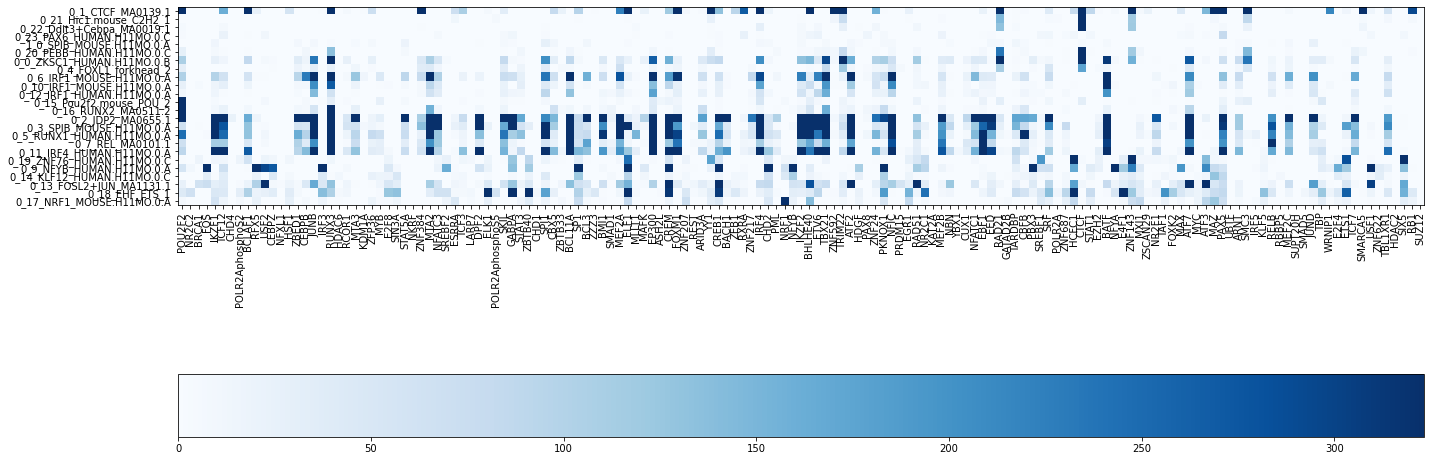

In [18]:
import sklearn.cluster
import scipy.cluster.hierarchy
import scipy.stats

def cluster_matrix_indices(matrix, num_clusters):
    """
    Clusters matrix using k-means. Always clusters on the first
    axis. Returns the indices needed to optimally order the matrix
    by clusters.
    """
    if len(matrix) == 1:
        # Don't cluster at all
        return np.array([0])

    num_clusters = min(num_clusters, len(matrix))
    
    # Perform k-means clustering
    kmeans = sklearn.cluster.KMeans(n_clusters=num_clusters)
    cluster_assignments = kmeans.fit_predict(matrix)

    # Perform hierarchical clustering on the cluster centers to determine optimal ordering
    kmeans_centers = kmeans.cluster_centers_
    cluster_order = scipy.cluster.hierarchy.leaves_list(
        scipy.cluster.hierarchy.optimal_leaf_ordering(
            scipy.cluster.hierarchy.linkage(kmeans_centers, method="centroid"), kmeans_centers
        )
    )

    # Order the peaks so that the cluster assignments follow the optimal ordering
    cluster_inds = []
    for cluster_id in cluster_order:
        cluster_inds.append(np.where(cluster_assignments == cluster_id)[0])
    cluster_inds = np.concatenate(cluster_inds)
    return cluster_inds

import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

# Create a figure with the right dimensions
fig, ax = plt.subplots(figsize=(20, 16))


 
inds = cluster_matrix_indices(motif_chip_pval_matrix,10)

zero_mask = motif_chip_pval_matrix == 0
min_val = np.min(motif_chip_pval_matrix[~zero_mask])
motif_chip_pval_matrix[zero_mask] = min_val
logpval_matrix = -np.log10(motif_chip_pval_matrix)
 

hmap = ax.imshow(logpval_matrix[inds], cmap="Blues")


# Set axes on heatmap
ax.set_yticks(np.arange(len(unique_motifs)))
ax.set_yticklabels(np.array(unique_motifs)[inds])
ax.set_xticks(np.arange(len(uniq_tfs)))
ax.set_xticklabels(np.array(uniq_tfs), rotation=90)

fig.colorbar(hmap, orientation="horizontal")

fig.tight_layout()
    

plt.show()

In [19]:
unique_motifs

from statsmodels.sandbox.stats.multicomp import multipletests


0_0_ZKSC1_HUMAN.H11MO.0.B
['RAD21' 'CTCF' 'BATF' 'TRIM22' 'JUNB']
0_1_CTCF_MA0139.1
['CTCF' 'RAD21' 'SMC3' 'ZNF143' 'TRIM22']
0_2_JDP2_MA0655.1
['BATF' 'JUNB' 'JUND' 'IRF4' 'BCL11A']
0_3_SPIB_MOUSE.H11MO.0.A
['SPI1' 'BCL11A' 'ETV6' 'EP300' 'IRF4']
0_4_FOXL1_forkhead_2
['EZH2' 'STAT3' 'ZNF384' 'MEF2A' 'PRDM15']
0_5_RUNX1_HUMAN.H11MO.0.A
['RUNX3' 'CBFB' 'TBX21' 'STAT3' 'BCL11A']
0_6_IRF1_MOUSE.H11MO.0.A
['JUNB' 'BATF' 'KDM1A' 'CEBPB' 'NFIC']
0_7_REL_MA0101.1
['RELB' 'BCL11A' 'BCL3' 'FOXM1' 'BATF']
0_9_NFYB_HUMAN.H11MO.0.A
['FOS' 'NFYA' 'IRF3' 'NFYB' 'RFX5']
0_10_IRF1_MOUSE.H11MO.0.A
['BATF' 'JUNB' 'IRF4' 'NFIC' 'STAT3']
0_11_IRF4_HUMAN.H11MO.0.A
['SPI1' 'IRF4' 'EZH2' 'EP300' 'BCL11A']
0_12_IRF1_HUMAN.H11MO.0.A
['BATF' 'BCL11A' 'JUNB' 'JUND' 'TBX21']
0_13_FOSL2+JUN_MA1131.1
['ATF3' 'USF2' 'ATF2' 'ATF7' 'USF1']
0_14_KLF12_HUMAN.H11MO.0.C
['ZNF622' 'CEBPZ' 'FOS' 'NFYB' 'SP1']
0_15_Pou2f2.mouse_POU_2
['POU2F2' 'MYB' 'IRF4' 'TBP' 'TCF7']
0_16_RUNX2_MA0511.2
['POU2F2' 'RUNX3' 'TBX21' 'CBX5' 'M

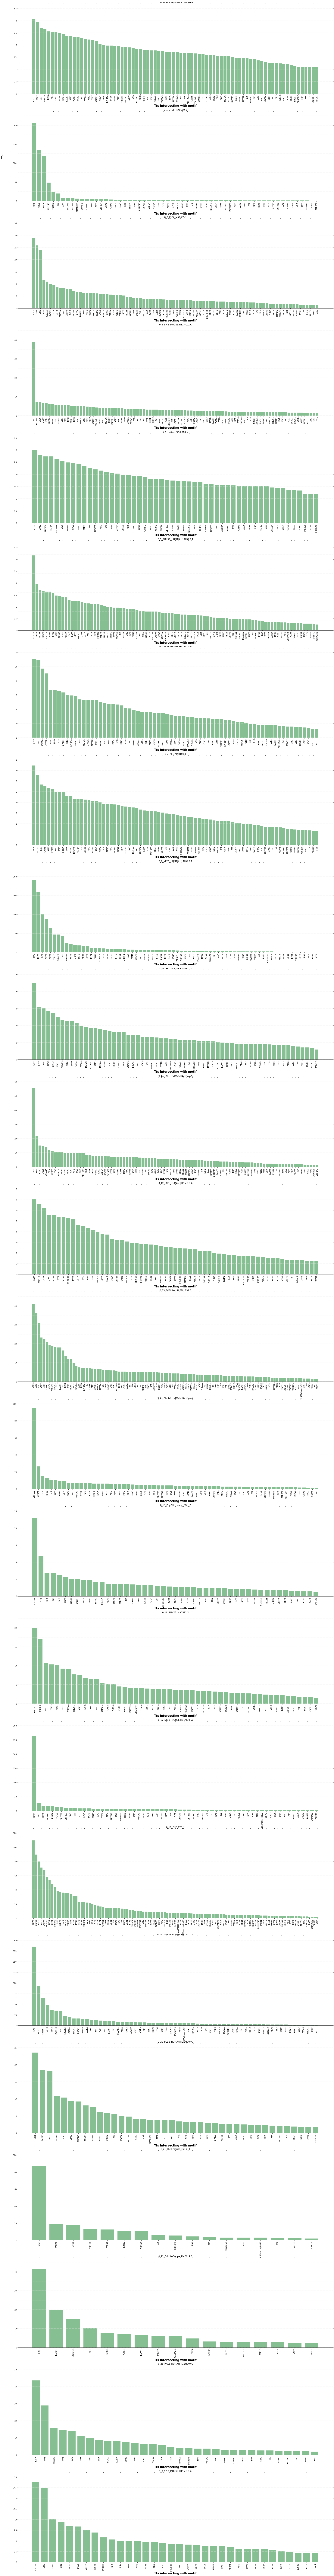

<Figure size 432x288 with 0 Axes>

In [22]:
fig, axs = plt.subplots(24,figsize=(30,250))
from matplotlib.ticker import StrMethodFormatter


for i in range(24):
    print(unique_motifs[i])
    p_adjusted = multipletests(motif_chip_pval_matrix[i,:], method='fdr_bh')
    idxs = np.argsort(odds_ratio[i,np.array(p_adjusted[0])])[::-1]
 
    ax = axs[i]
    tfs = np.array(uniq_tfs)[np.array(p_adjusted[0])][idxs]
    counts = odds_ratio[i,np.array(p_adjusted[0])][idxs]
    ax.bar(tfs, counts,color="#86bf91")
    ax.set_xticks(tfs,rotation='vertical')

    #ax.set_ylabel('odds ratio')
    #ax.set_ylabel('TFs significantly co-occuring with motif')

    ax.set_title(unique_motifs[i])

    print(np.array(uniq_tfs)[np.array(p_adjusted[0])][idxs][0:5])
    #print(odds_ratio[i,np.array(p_adjusted[0])][idxs][-5:])
    
for i,x in enumerate(axs):

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set x-axis label
    x.set_xlabel("Tfs intersecting with motif", weight='bold', size=15)

    # Set y-axis label
    if i == 1:
        x.set_ylabel("TFs", labelpad=50, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

    x.tick_params(axis='x', rotation=90)
plt.show()
plt.tight_layout()

In [21]:
unique_motifs

['0_0_ZKSC1_HUMAN.H11MO.0.B',
 '0_1_CTCF_MA0139.1',
 '0_2_JDP2_MA0655.1',
 '0_3_SPIB_MOUSE.H11MO.0.A',
 '0_4_FOXL1_forkhead_2',
 '0_5_RUNX1_HUMAN.H11MO.0.A',
 '0_6_IRF1_MOUSE.H11MO.0.A',
 '0_7_REL_MA0101.1',
 '0_9_NFYB_HUMAN.H11MO.0.A',
 '0_10_IRF1_MOUSE.H11MO.0.A',
 '0_11_IRF4_HUMAN.H11MO.0.A',
 '0_12_IRF1_HUMAN.H11MO.0.A',
 '0_13_FOSL2+JUN_MA1131.1',
 '0_14_KLF12_HUMAN.H11MO.0.C',
 '0_15_Pou2f2.mouse_POU_2',
 '0_16_RUNX2_MA0511.2',
 '0_17_NRF1_MOUSE.H11MO.0.A',
 '0_18_EHF_ETS_1',
 '0_19_ZNF76_HUMAN.H11MO.0.C',
 '0_20_PEBB_HUMAN.H11MO.0.C',
 '0_21_Hic1.mouse_C2H2_1',
 '0_22_Ddit3+Cebpa_MA0019.1',
 '0_23_PAX6_HUMAN.H11MO.0.C',
 '1_0_SPIB_MOUSE.H11MO.0.A']